# Understanding sampling and spatial resolution of a system
The first term we have to understand is sampling. We can defined sampling the spatial or temporal interval between two measurments.
The spatial resolution of a system it's one of the most important and debated parameters. 
The resolution is generally defined as the capability of resolving two adiacent peaks or signal. But this is quite a rectrictive definition and in this tutorial we will try to use a definition that encompass all the examples we will see.
We define the resolution of a system as a function that defined for each measurement element (e.g. pixel) the contribution of nearby surrounding on the measurment. In other words, we are trying to undestand the region that we are measuring and the function we are using to sampling the region. 

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import scipy.fftpack

For a first example, we imagine to be able to create a perfect "knife-edge" i.e. an element that is straight and parallel to a background.

In [22]:
knife_edge = np.ones((180,180))
knife_edge[:,90:] = 0
knife_edge[10][10]

1.0

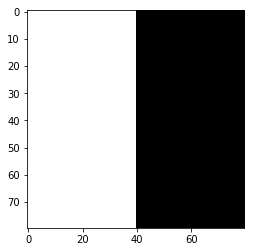

In [11]:
plt.imshow(knife_edge,cmap='gray')

Text(0.5, 0, 'Pixel number')

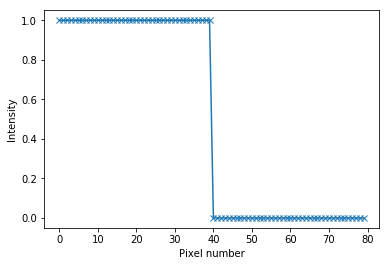

In [43]:
ideal_profile = knife_edge[5,:]
plt.plot(ideal_profile,marker='x')
plt.ylabel('Intensity')
plt.xlabel('Pixel number')

1.0000000000000002

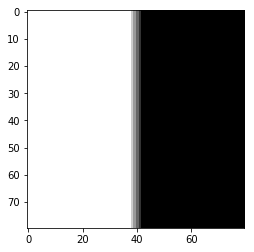

In [44]:
size = (5,5)
kernel = np.ones(size)/np.sum(np.ones(size))
acquired_image = ndimage.convolve(knife_edge,kernel)
plt.imshow(result,cmap='gray')
result[10][10] 

Text(0.5, 0, 'Pixel number')

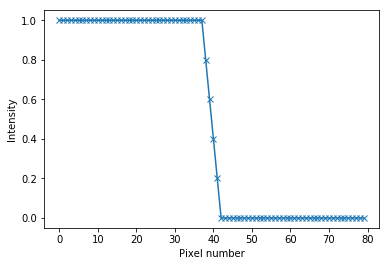

In [42]:
acquired_profile = acquired_image[5,:]
plt.plot(acquired_profile,marker='x')
plt.ylabel('Intensity')
plt.xlabel('Pixel number')

(30, 50)

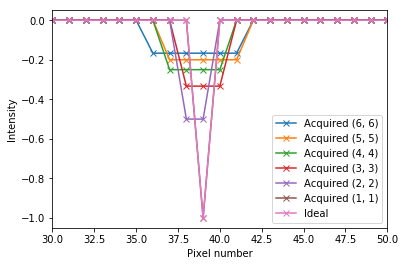

In [70]:
derivative_acquired = np.diff(acquired_profile)
derivative_ideal = np.diff(ideal_profile)
sizes = [(6,6),(5,5),(4,4),(3,3),(2,2),(1,1)]
for size in sizes:
    kernel = np.ones(size)/np.sum(np.ones(size))
    acquired_image = ndimage.convolve(knife_edge,kernel)
    derivative_acquired = np.diff(acquired_image[5,:])
    plt.plot(derivative_acquired,marker='x',label='Acquired %s' %str(size))
plt.plot(derivative_ideal,marker='x',label='Ideal')
plt.ylabel('Intensity')
plt.xlabel('Pixel number')
plt.legend(loc='lower right')
plt.xlim(30,50)

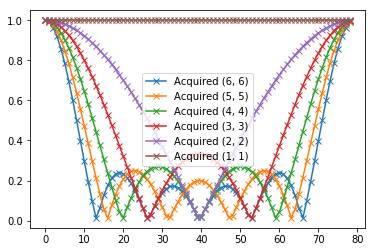

In [72]:
Y    = np.fft.fft(derivative_acquired)
freq = np.fft.fftfreq(len(derivative_acquired), 80)

sizes = [(6,6),(5,5),(4,4),(3,3),(2,2),(1,1)]
for size in sizes:
    kernel = np.ones(size)/np.sum(np.ones(size))
    acquired_image = ndimage.convolve(knife_edge,kernel)
    derivative_acquired = np.diff(acquired_image[5,:])
    plt.plot(np.abs(np.fft.fft(derivative_acquired)),marker='x',label='Acquired %s' %str(size))
plt.legend()

In [94]:
mid_point = chart.shape[0]/2

In [95]:
from itertools import cycle
zeroone = cycle([0,1])
chart[:,4]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [139]:

zeroone = cycle([0,1])
chart = np.ones((50,500))
mid_point = chart.shape[1]/2
while mid_point < chart.shape[1]:
    value = next(zeroone)
    chart[:,int(mid_point):] = value
    mid_point += (chart.shape[1]-mid_point)/2
    

In [192]:
zeroone = cycle([0,1])
chart = np.ones((50,1500))
mid_point = chart.shape[1]/2
while mid_point >0:
    value = next(zeroone)
    chart[:,:int(mid_point)] = value
    mid_point/=2

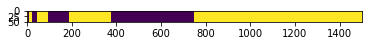

In [196]:
plt.imshow(chart)


[]

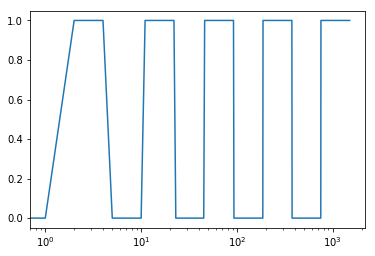

In [187]:
plt.plot(chart[5,:])
plt.semilogx()

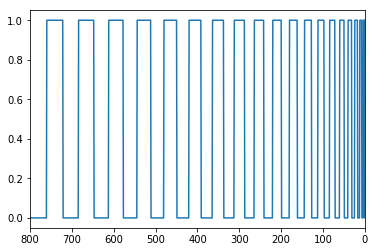

In [240]:
linear_signal = []
minima = []
maxima = []
number_of_bands=20
starting_width = 1
for step in range(1,number_of_bands*2,2):
    minima.append(len(linear_signal)+int(step*starting_width*1.5))
    maxima.append(len(linear_signal)+int(step*starting_width*0.5))
    linear_signal += [1]*step*starting_width + [0]*step*starting_width

plt.xlim(800,0)
plt.plot(linear_signal)

In [220]:
ideal = np.array(linear_signal*100).reshape(100,len(linear_signal)).astype(np.float)

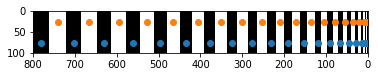

In [222]:
plt.imshow(ideal,cmap='gray')
plt.xlim(800,0)
plt.scatter(minima,np.ones(len(minima))*75)
plt.scatter(maxima,np.ones(len(maxima))*25)

(20, 0)

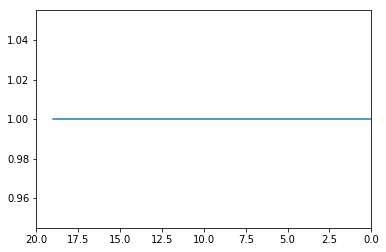

In [225]:
contrast = (ideal[:,maxima] - ideal[:,minima])/(ideal[:,maxima] + ideal[:,minima])
plt.plot(contrast[5,:])
plt.xlim(20,0)

(800, 0)

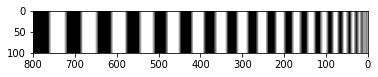

In [241]:
size = (8,8)
kernel = np.ones(size)/np.sum(np.ones(size))
acquired_image = ndimage.convolve(ideal,kernel)
plt.imshow(acquired_image,cmap='gray')
plt.xlim(800,0)

(800, 0)

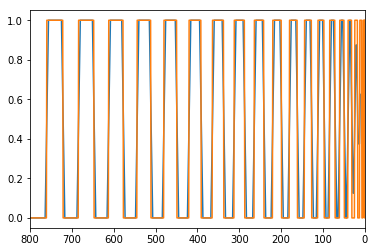

In [242]:
plt.plot(acquired_image[4,:])
plt.plot(ideal[4,:])
plt.xlim(800,0)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])

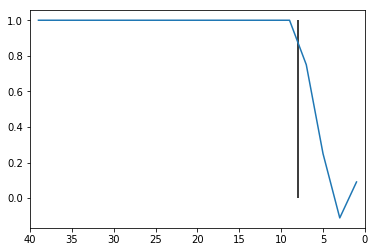

In [244]:
contrast_acquired = (acquired_image[:,maxima] - acquired_image[:,minima])/(acquired_image[:,maxima] + acquired_image[:,minima])
wavelength = np.array(minima) -np.array(maxima)
plt.plot(wavelength,contrast_acquired[5,:])
plt.vlines(8,0,1)
plt.xlim(40,0)
wavelength